# Limpieza y preparación de datos

# Inicio Clase 72

## 2.1 Tratamiento de los datos que faltan

### En muchas aplicaciones de análisis de datos es habitual que falten datos. Uno de los objetivos de pandas es hacer que trabajar con datos perdidos sea lo menos doloroso posible. Por ejemplo, todas las estadísticas descriptivas de los objetos de pandas excluyen por defecto los datos que faltan.

### La forma en que se representan los datos que faltan en los objetos de pandas es algo imperfecta, pero es suficiente para la mayoría de los usos en el mundo real. Para datos con dtype float64, pandas utiliza el valor de coma flotante NaN (`Not a Number`) para representar los datos que faltan.

Lo llamamos valor centinela (sentinel value): cuando está presente, indica un valor ausente (o nulo):

In [37]:
import pandas as pd
import numpy as np
float_data = pd.Series([1.8, -3.5, np.nan, 0])

In [38]:
float_data

0    1.8
1   -3.5
2    NaN
3    0.0
dtype: float64

# Ejemplo similar 

In [39]:
import pandas as pd
import numpy as np

# Creamos un Series de números enteros
int_data = pd.Series([10, 5, -2, 1, 0])

# Creamos un Series de cadenas de texto
string_data = pd.Series(["Hola", "Mundo", "Python", "Pandas"])

# Creamos un Series de fechas
fecha_data = pd.Series(pd.date_range('2023-01-01', periods=5))

# Imprimimos cada Series
print("Datos enteros:")
print(int_data)
print("\nDatos de texto:")
print(string_data)
print("\nDatos de fecha:")
print(fecha_data)


Datos enteros:
0    10
1     5
2    -2
3     1
4     0
dtype: int64

Datos de texto:
0      Hola
1     Mundo
2    Python
3    Pandas
dtype: object

Datos de fecha:
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
dtype: datetime64[ns]


El método `isna` nos da una Serie Booleana con `True` donde los valores son 'nulos':

In [40]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

# Ejemplo similar 

In [41]:

int_data = pd.Series([10, 5, -2, 1, 0])

# Aplicamos isna()
isna_data = int_data.isna()

# Imprimimos el resultado
print("Valores faltantes (isna):")
print(isna_data)


Valores faltantes (isna):
0    False
1    False
2    False
3    False
4    False
dtype: bool


En pandas, hemos adoptado una convención utilizada en el lenguaje de programación R refiriéndonos a los datos perdidos como `NA`, que significa no disponible (`Not Available`). 

El valor `None` (ausencia de un valor o un valor nulo) incorporado en Python también se trata como `NA`:

In [42]:
string_data = pd.Series(['abcd', np.nan, None, 'dfeg'])

string_data

0    abcd
1     NaN
2    None
3    dfeg
dtype: object

# Ejemplo similar 

In [43]:
import pandas as pd
import numpy as np

int_data = pd.Series([10, 5, -2, 1, 0])

# Reemplazamos valores con None
int_data.replace(to_replace=np.nan, method='fillna', value=None, inplace=True)

# Imprimimos el resultado
print("Datos con None en lugar de NaN:")
print(int_data)


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_16104\387331935.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  int_data.replace(to_replace=np.nan, method='fillna', value=None, inplace=True)


ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got fillna

In [ ]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

El método `isna` nos da una Serie Booleana con `True` donde los valores son 'nulos':

In [ ]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [ ]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

**Otros metodos**


`dropna()`: es un método utilizado para eliminar filas o columnas que contienen valores nulos (NaN).  

`fillna`: Rellena los datos que faltan con algún valor o utilizando un método de interpolación como `ffill` o `bfill`.

`ìsna()`: Devuelve valores booleanos que indican qué valores faltan `NA`. 

`notna`: Negación de `isna`, devuelve `True` para valores no `NA` y False para valores `NA`.

### Filtrar los datos que faltan

Hay algunas formas de filtrar los datos que faltan. Aunque siempre se tiene la opción de hacerlo a mano usando `pandas.isna()` y la indexación booleana, `dropna()` puede ser útil. En una Serie, devuelve la Serie con sólo los datos no nulos y los valores de índice:

In [ ]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

Esto es lo mismo que hacer:

In [ ]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

Con los objetos DataFrame, hay diferentes formas de eliminar los datos que faltan. Es posible que desee eliminar las filas o columnas que son todas NA, o sólo las filas o columnas que contienen cualquier NA en absoluto. `dropna()` por defecto elimina cualquier fila que contenga un valor perdido:

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
             [np.nan, np.nan, np.nan],
             [np.nan, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
 data.dropna()

,0,1,2
0,1.0,6.5,3.0


Si se pasa `how="all"`, sólo se eliminarán las filas que sean todas NA:

In [ ]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


Tenga en cuenta que estas funciones devuelven nuevos objetos por defecto y no modifican el contenido del objeto original.

Para soltar (drop) columnas del mismo modo, pase `axis="columns"`:


In [ ]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Supongamos que desea conservar sólo las filas que contengan como máximo un determinado número de observaciones omitidas.  
Puede indicarlo con el argumento `thresh`, el cual especifica el número mínimo de valores no nulos que deben estar presentes en una fila o columna para que no sea eliminada.  
Si una fila o columna no cumple con este umbral mínimo de valores no nulos, será eliminada del DataFrame.

In [ ]:
 df = pd.DataFrame(np.random.standard_normal((7, 3)))

In [ ]:
df

,0,1,2
0,0.683664,1.020434,-0.885169
1,-0.156163,1.786871,-0.556343
2,-0.940694,1.261655,-0.180081
3,0.468346,-0.035663,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


In [ ]:
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

In [ ]:
df

,0,1,2
0,0.683664,NaN,NaN
1,-0.156163,NaN,NaN
2,-0.940694,NaN,-0.180081
3,0.468346,NaN,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


In [ ]:
df.dropna()

,0,1,2
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


In [ ]:
df.dropna(thresh=2)

,0,1,2
2,-0.940694,NaN,-0.180081
3,0.468346,NaN,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


### Rellenar los datos que faltan

En lugar de filtrar los datos que faltan (y potencialmente descartar otros datos junto con ellos), es posible que desee rellenar los "huecos" de varias maneras. Para la mayoría de los propósitos, el método `fillna()` es la función a utilizar. Llamar a `fillna()` con una constante sustituye los valores que faltan por ese valor:

In [ ]:
df

,0,1,2
0,0.683664,NaN,NaN
1,-0.156163,NaN,NaN
2,-0.940694,NaN,-0.180081
3,0.468346,NaN,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


In [ ]:
df.fillna(0)

,0,1,2
0,0.683664,0.000000,0.000000
1,-0.156163,0.000000,0.000000
2,-0.940694,0.000000,-0.180081
3,0.468346,0.000000,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


Llamando a `fillna()` con un diccionario, puede utilizar un valor de relleno diferente para cada columna:

In [ ]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.683664,0.500000,0.000000
1,-0.156163,0.500000,0.000000
2,-0.940694,0.500000,-0.180081
3,0.468346,0.500000,1.115405
4,0.890656,0.450760,0.987928
5,-0.605689,0.038853,0.654476
6,0.504502,0.338968,-0.873123


Los mismos métodos de interpolación disponibles para la reindexación pueden utilizarse con `fillna()`:

In [ ]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

In [ ]:
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-1.872448,-1.489863,-0.934127
1,-1.333281,-0.741391,-0.393580
2,-0.835737,NaN,-1.098128
3,0.100454,NaN,1.420427
4,1.364626,NaN,NaN
5,-0.544929,NaN,NaN


In [ ]:
 df.fillna(method="ffill")

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_12324\4205080046.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,0,1,2
0,-1.872448,-1.489863,-0.934127
1,-1.333281,-0.741391,-0.393580
2,-0.835737,-0.741391,-1.098128
3,0.100454,-0.741391,1.420427
4,1.364626,-0.741391,1.420427
5,-0.544929,-0.741391,1.420427


In [ ]:
df.fillna(method="ffill", limit=2)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_12324\1627181726.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", limit=2)


,0,1,2
0,-1.872448,-1.489863,-0.934127
1,-1.333281,-0.741391,-0.393580
2,-0.835737,-0.741391,-1.098128
3,0.100454,-0.741391,1.420427
4,1.364626,NaN,1.420427
5,-0.544929,NaN,1.420427


Con `fillna()` puede hacer muchas otras cosas, como la imputación simple de datos utilizando la mediana o la media estadística:

In [ ]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [ ]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

**Funciones de argumento para `fillna`**

`value`: Valor escalar u objeto tipo diccionario que se utilizará para rellenar los valores que faltan.

`method`: Método de interpolación: uno de "bfill" (relleno hacia atrás) o "ffill" (relleno hacia delante); por defecto es None

`axis`: Eje de relleno ("index" o "columns"); por defecto axis="index".

`limit`: Para el llenado hacia delante y hacia atrás, número máximo de periodos consecutivos a llenar

## Transformación de datos

Hasta ahora nos hemos ocupado de la gestión de los datos que faltan. El filtrado, la limpieza y otras transformaciones son otra clase de operaciones importantes.

### Remover duplicados

Pueden encontrarse filas duplicadas en un DataFrame por cualquier número de razones. He aquí un ejemplo:

In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2":[1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


El método DataFrame `duplicated` devuelve una serie booleana que indica si cada fila es un duplicado (sus valores de columna son exactamente iguales a los de una fila anterior) o no:

In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

En relación con esto, `drop_duplicates` devuelve un DataFrame con filas en las que se ha filtrado False el array duplicado:

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Ambos métodos consideran por defecto todas las columnas; alternativamente, puede especificar cualquier subconjunto de ellas para detectar duplicados. Supongamos que tenemos una columna adicional de valores y queremos filtrar los duplicados basándonos sólo en la columna "k1":

In [ ]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
# Añadimos una tercera columna
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


`duplicated` y `drop_duplicates` mantienen por defecto la primera combinación de valores observada. Si se pasa `keep="last"` se devolverá la última.  
El argumento `keep` puede tomar tres valores:

`"first"`: (por defecto) Mantiene la primera aparición de una fila duplicada y elimina las subsecuentes.  

`"last"`: Mantiene la última aparición de una fila duplicada y elimina las anteriores.  

`"False"`: Elimina todas las filas duplicadas, no conservando ninguna.

In [ ]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [ ]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transformación de datos mediante una `Function` o `Mapping`

Para muchos conjuntos de datos, es posible que desee realizar alguna transformación basada en los valores de un array, Serie o columna de un DataFrame. Considere los siguientes datos hipotéticos recogidos sobre varios tipos de jamón:

In [ ]:
data = pd.DataFrame({"food": ["bacon", "pulled pork",
                              "bacon","pastrami", "corned beef",
                              "bacon", "pastrami", "honey ham",
                              "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Supongamos que queremos añadir una columna que indique el tipo de animal del que procede cada alimento. Escribamos una correspondencia entre cada tipo de carne y el tipo de animal:

In [ ]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

El método `map` de una serie acepta una función u objeto de tipo diccionario que contenga un mapeo para realizar la transformación de los valores:

In [ ]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


También podríamos haber pasado una función que haga todo el trabajo:

In [ ]:
def get_animal(x):
    return meat_to_animal[x]

data["animal"] = data["food"].map(get_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Sustitución de valores

Rellenar los datos que faltan con el método `fillna` es un caso especial de sustitución de valores más general. Como ya se ha visto, `map` puede utilizarse para modificar un subconjunto de valores de un objeto, tambien `replace` proporciona una forma más sencilla y flexible de hacerlo. Consideremos esta serie:

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Los valores `-999` podrían ser valores centinela de datos perdidos. Para reemplazarlos por valores `NA` que pandas entienda, podemos usar `replace`, produciendo una nueva Serie:

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Si desea sustituir varios valores a la vez, debe pasar una lista y, a continuación, el valor sustituido:

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

Para utilizar un sustituto diferente para cada valor, pase una lista de sustitutos:

In [ ]:
 data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

El argumento pasado también puede ser un diccionario:

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

El método `data.replace()` es distinto de `data.str.replace`, que realiza la sustitución de cadenas por elementos. Veremos estos métodos de cadena en Series más adelante.

### Renombrar índices de ejes

Al igual que los valores de una Serie, las etiquetas de los ejes pueden transformarse de forma similar mediante una función o un mapeo (`mapping`) de algún tipo para producir nuevos objetos etiquetados de forma diferente. También puede modificar los ejes in situ sin crear una nueva estructura de datos. He aquí un ejemplo sencillo:

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["Ohio", "Colorado", "New York"],
                    columns=["one", "two", "three", "four"])
                    
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Al igual que una Serie, los índices de eje tienen un método `map`:

In [ ]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)
#Index(['OHIO', 'COLO', 'NEW '], dtype='object')

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [ ]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can assign to the `index` attribute, modifying the DataFrame in place:

In [ ]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


Si desea crear una versión transformada de un conjunto de datos sin modificar el original, un método útil es `rename`:


In [ ]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


En particular, renombrar puede utilizarse junto con un objeto tipo diccionario, proporcionando nuevos valores para un subconjunto de las etiquetas de los ejes:

In [ ]:
data.rename(index={"OHIO": "Madrid"},
            columns={"three": "tres"})
            

,one,two,tres,four
Madrid,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretización y `binning`

La discretización y el binning son técnicas utilizadas en la preprocesamiento de datos para convertir datos continuos en discretos. Estas técnicas son útiles para reducir la variabilidad, agrupar datos similares y mejorar el rendimiento de algunos algoritmos de aprendizaje automático

### Discretización.  

Es el proceso de convertir datos continuos en datos categóricos dividiendo el rango de valores continuos en intervalos (bins).

### Binning (Agrupación por intervalos)
El `binning` es una técnica de discretización que agrupa los datos en intervalos, o `"bins"`.  
Hay varios métodos para hacer `binning` en pandas, como el binning por frecuencia, el binning por longitud de intervalo y el binning basado en la cuantilación (por ejemplo Cuartil).

Los datos continuos suelen discretizarse o separarse en "intervalos" (bins) para su análisis. Supongamos que se dispone de datos sobre un grupo de personas en un estudio y desea agruparlas en grupos de edad discretos:

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Vamos a dividirlos en franjas (bins) de 18 a 25, de 26 a 35, de 36 a 60 y, por último, de 61 años en adelante. Para ello, hay que utilizar `pandas.cut`:

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
age_categories = pd.cut(ages, bins)

In [ ]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

El objeto que pandas devuelve es un objeto `Categorical` especial. La salida que se ve describe los bins calculados por `pandas.cut`. Cada bin se identifica por un tipo de valor de intervalo especial (único en pandas) que contiene el límite inferior y superior de cada bin:

In [ ]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [ ]:
age_categories.categories[0]

Interval(18, 25, closed='right')

In [ ]:
pd.value_counts(age_categories)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_12324\3010498523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(age_categories)


(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

Tenga en cuenta que `pd.value_counts(categories)` son los recuentos bin del resultado de `pandas.cut`.

En la representación de cadena de un intervalo, un paréntesis significa que el lado está abierto (excluyente), mientras que el corchete significa que está cerrado (incluyente). Puede cambiar el lado cerrado pasando `right=False`

In [ ]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

Puede anular el etiquetado de contenedores por defecto basado en intervalos pasando una lista o array a la opción `labels`:

In [ ]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

Consideremos el caso de unos datos distribuidos uniformemente y cortados en cuartos:

In [ ]:
data = np.random.uniform(size=20)
data

array([0.60596694, 0.97031337, 0.20332058, 0.48830567, 0.53227812,
       0.29890876, 0.01476451, 0.82053399, 0.46276091, 0.57615062,
       0.39785988, 0.38429785, 0.80129888, 0.2353611 , 0.73137106,
       0.32717012, 0.15724803, 0.3815884 , 0.4970748 , 0.58213147])

In [ ]:
pd.cut(data, 4, precision=2)

[(0.49, 0.73], (0.73, 0.97], (0.014, 0.25], (0.25, 0.49], (0.49, 0.73], ..., (0.25, 0.49], (0.014, 0.25], (0.25, 0.49], (0.49, 0.73], (0.49, 0.73]]
Length: 20
Categories (4, interval[float64, right]): [(0.014, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.97]]

La opción `precision=2` limita la precisión decimal a dos dígitos distintos de cero.

Una función estrechamente relacionada, `pandas.qcut`, separa los datos basándose en los cuantiles de la muestra. Dependiendo de la distribución de los datos, el uso de `pandas.cut` no siempre resultará en que cada contenedor tenga el mismo número de puntos de datos. Dado que `pandas.qcut` utiliza los cuantiles de la muestra en su lugar, obtendrá intervalos de tamaño más o menos igual:

In [ ]:
data = np.random.standard_normal(1000)
data

array([-1.27222472e+00, -1.23310950e+00,  1.54598919e+00, -6.19072963e-02,
        7.64512882e-01,  7.30445162e-01,  4.48282066e-01,  6.43254549e-01,
       -4.81278280e-01, -1.10280940e-01, -7.44072208e-01, -8.84743170e-01,
       -1.71526291e-01,  6.19988589e-01, -3.46240815e-01, -1.18816764e+00,
       -1.10708054e+00, -1.43516346e+00,  6.80918535e-01, -8.53758524e-02,
       -5.32607871e-02,  3.52958009e-01,  4.53432782e-01, -5.11976456e-01,
        1.16033165e-01,  1.73970136e-01, -4.01562230e-01, -1.01864939e+00,
       -6.74003319e-02,  2.45601706e-01,  6.21139301e-01,  1.12959639e+00,
       -5.80270700e-03,  1.11241366e+00,  2.70511174e-01, -1.43360979e+00,
       -2.73863980e-01, -1.07480016e-01, -6.15710446e-01, -3.96597216e-01,
        5.02016754e-01,  4.66746794e-01,  8.54578922e-01, -2.46899095e-01,
        8.59630588e-01,  8.67544362e-01,  2.52452049e-03,  1.59327179e-01,
       -6.19082261e-02,  8.18216163e-01, -1.07973917e+00, -4.21742748e-02,
        6.38108581e-01, -

In [ ]:
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(-3.1599999999999997, -0.66], (-3.1599999999999997, -0.66], (0.62, 3.33], (-0.66, -0.0043], (0.62, 3.33], ..., (-0.66, -0.0043], (-0.0043, 0.62], (0.62, 3.33], (-3.1599999999999997, -0.66], (-0.0043, 0.62]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.1599999999999997, -0.66] < (-0.66, -0.0043] < (-0.0043, 0.62] < (0.62, 3.33]]

In [ ]:
pd.value_counts(quartiles)

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_12324\3472704981.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(quartiles)


(-3.1599999999999997, -0.66]    250
(-0.66, -0.0043]                250
(-0.0043, 0.62]                 250
(0.62, 3.33]                    250
Name: count, dtype: int64

In [ ]:
pd.Series(quartiles).value_counts()

(-3.1599999999999997, -0.66]    250
(-0.66, -0.0043]                250
(-0.0043, 0.62]                 250
(0.62, 3.33]                    250
Name: count, dtype: int64

De forma similar a `pandas.cut`, el usuario puede pasar sus propios cuantiles (números entre 0 y 1, ambos inclusive):

In [ ]:
data

array([-1.27222472e+00, -1.23310950e+00,  1.54598919e+00, -6.19072963e-02,
        7.64512882e-01,  7.30445162e-01,  4.48282066e-01,  6.43254549e-01,
       -4.81278280e-01, -1.10280940e-01, -7.44072208e-01, -8.84743170e-01,
       -1.71526291e-01,  6.19988589e-01, -3.46240815e-01, -1.18816764e+00,
       -1.10708054e+00, -1.43516346e+00,  6.80918535e-01, -8.53758524e-02,
       -5.32607871e-02,  3.52958009e-01,  4.53432782e-01, -5.11976456e-01,
        1.16033165e-01,  1.73970136e-01, -4.01562230e-01, -1.01864939e+00,
       -6.74003319e-02,  2.45601706e-01,  6.21139301e-01,  1.12959639e+00,
       -5.80270700e-03,  1.11241366e+00,  2.70511174e-01, -1.43360979e+00,
       -2.73863980e-01, -1.07480016e-01, -6.15710446e-01, -3.96597216e-01,
        5.02016754e-01,  4.66746794e-01,  8.54578922e-01, -2.46899095e-01,
        8.59630588e-01,  8.67544362e-01,  2.52452049e-03,  1.59327179e-01,
       -6.19082261e-02,  8.18216163e-01, -1.07973917e+00, -4.21742748e-02,
        6.38108581e-01, -

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts()

(-3.1519999999999997, -1.278]    100
(-1.278, -0.00435]               400
(-0.00435, 1.24]                 400
(1.24, 3.333]                    100
Name: count, dtype: int64

El segundo argumento `[0, 0.1, 0.5, 0.9, 1.]` especifica los puntos de corte para los cuantiles.  
Estos puntos de corte son porcentajes que indican cómo se deben dividir los datos.  

`0` corresponde al valor mínimo.  
`0.1` corresponde al percentil 10 (el valor por debajo del cual se encuentra el 10% de los datos).  
`0.5` corresponde al percentil 50 (la mediana).  
`0.9` corresponde al percentil 90 (el valor por debajo del cual se encuentra el 90% de los datos).  
`1.` corresponde al valor máximo.  

# Fin Clase 73

### Detección y filtrado de valores atípicos (outliers)

Filtrar o transformar los valores atípicos es en gran medida una cuestión de aplicar operaciones de arrays. Considere un DataFrame con algunos datos distribuidos normalmente:

**Un valor atípico (outlier, en inglés) es una observación que numéricamente es muy distinta al resto de elementos de una muestra. Estos datos nos pueden causar problemas en la interpretación de lo que ocurre en un proceso o en una población.**

### Ejercicio_1: Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 1.25 y menores a -1.25. Los plots son opcionales.

In [ ]:
data_1 = pd.DataFrame(np.random.standard_normal((1000, 4)), columns=['A', 'B', 'C', 'D'])
data_1.head()

,A,B,C,D
0,-0.207534,-0.351576,-0.396297,-1.026466
1,0.358570,2.018310,1.326221,1.164441
2,0.113174,0.449530,0.731518,1.244991
3,0.605582,-1.074185,-1.914073,-0.000950
4,0.159208,-0.908586,-0.468134,-0.782160


In [ ]:
import pandas as pd
import numpy as np

# Crear el DataFrame
data_1 = pd.DataFrame(np.random.standard_normal((1000, 4)), columns=['A', 'B', 'C', 'D'])

# Mostrar las primeras filas del DataFrame
print(data_1.head())

# Definir los límites para los valores atípicos
limite_superior = 1.25
limite_inferior = -1.25

# Crear una máscara para los valores atípicos
mask = (data_1 > limite_superior) | (data_1 < limite_inferior)

# Reemplazar los valores atípicos con NaN (o con otro valor si prefieres)
data_1_filtrada = data_1.mask(mask)

# Mostrar las primeras filas del DataFrame filtrado
print(data_1_filtrada.head())


          A         B         C         D
0 -0.372938  0.310524  0.645673  0.479191
1  0.046526  2.296591 -0.583010  0.106711
2  0.823052  1.834956 -2.298903 -0.293005
3  1.559465 -0.767655 -0.172887 -0.577278
4  1.958009 -1.778810  2.586509 -0.553584
          A         B         C         D
0 -0.372938  0.310524  0.645673  0.479191
1  0.046526       NaN -0.583010  0.106711
2  0.823052       NaN       NaN -0.293005
3       NaN -0.767655 -0.172887 -0.577278
4       NaN       NaN       NaN -0.553584


Este código filtra los valores atípicos y los reemplaza con NaN. Si prefieres reemplazar los valores atípicos con otro valor (por ejemplo, 0), puedes modificar la línea donde se usa mask:

In [ ]:
data_1_filtrada = data_1.mask(mask, 0)


Además, si deseas visualizar los datos antes y después del filtrado, puedes usar gráficos. Aquí hay un ejemplo utilizando Matplotlib para crear histogramas:

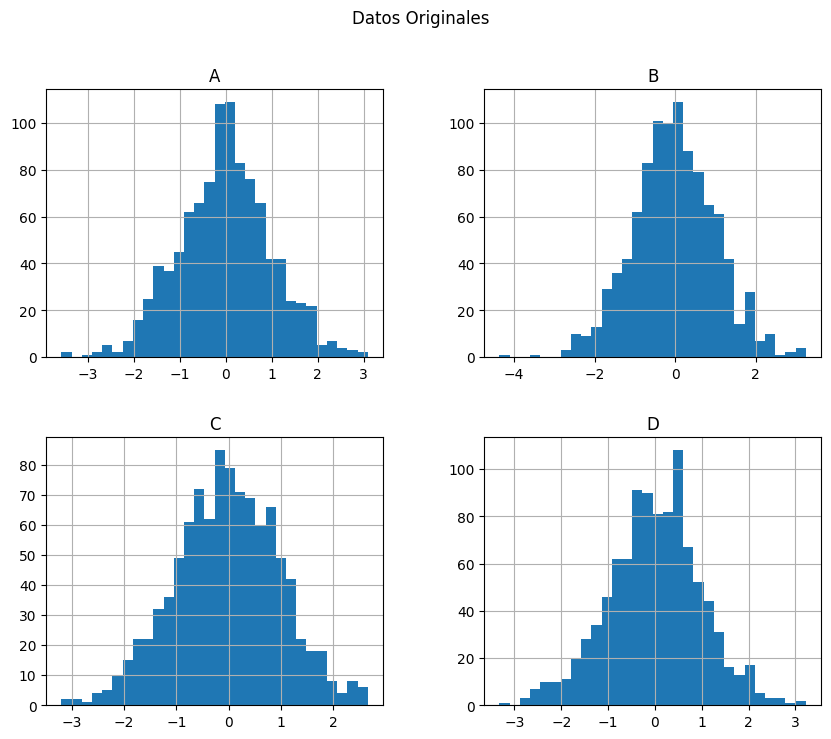

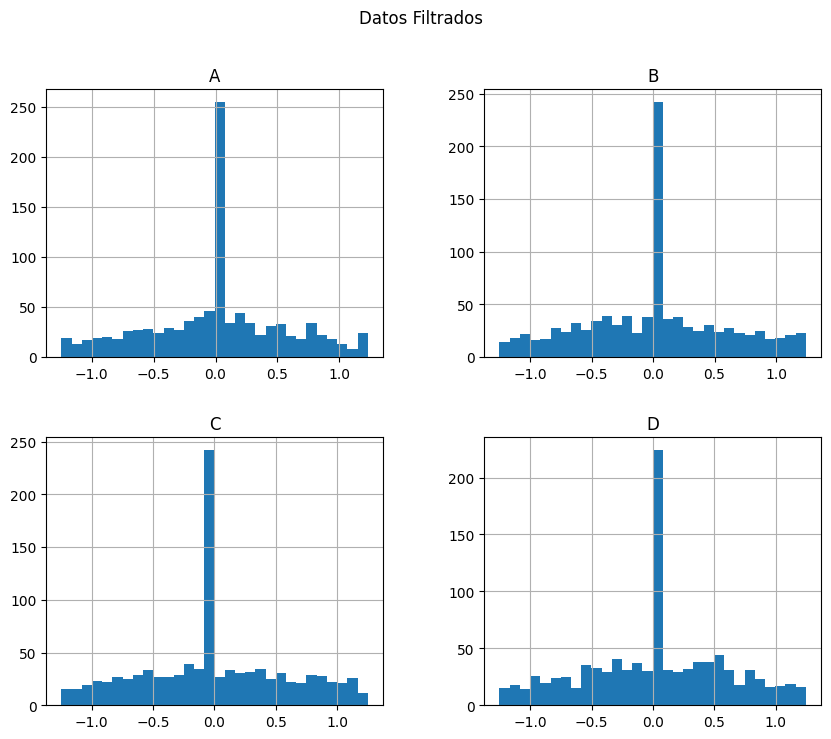

In [ ]:
import matplotlib.pyplot as plt

# Histograma de los datos originales
data_1.hist(bins=30, figsize=(10, 8))
plt.suptitle('Datos Originales')
plt.show()

# Histograma de los datos filtrados
data_1_filtrada.hist(bins=30, figsize=(10, 8))
plt.suptitle('Datos Filtrados')
plt.show()


### Ejercicio 2. Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 4 y menores a cero. Los plots son opcionales.

In [ ]:
data_2 = pd.DataFrame(np.random.uniform(-5, 5, size=(1000, 5)), columns=['A', 'B', 'C', 'D', 'E'])
data_2

,A,B,C,D,E
0,-3.812932,3.764131,-2.406248,-1.542574,-1.119964
1,0.323876,-2.208151,-1.897151,-3.917135,-3.503253
2,0.870591,4.673055,3.320933,-1.877146,0.487876
3,-2.665734,-4.911107,-1.272452,3.670427,-4.217197
4,-2.947200,0.411498,-4.442029,0.680958,-4.472560
...,...,...,...,...,...
995,0.042503,1.929028,-1.937234,-1.857349,4.837496
996,-4.218625,1.756690,0.383627,2.079437,-2.510714
997,4.329006,1.280003,-1.529298,-1.640789,1.585223
998,-2.685100,1.026337,2.534128,2.699679,1.545979


Para filtrar los valores atípicos en el DataFrame data_2 según los criterios proporcionados (valores mayores a 4 y menores a 0), podemos seguir un proceso similar al del ejercicio anterior:

Crear una máscara para identificar los valores atípicos.
Usar esta máscara para filtrar los valores y reemplazarlos con NaN o algún otro valor que prefieras.

In [ ]:
import pandas as pd
import numpy as np

# Crear el DataFrame
data_2 = pd.DataFrame(np.random.uniform(-5, 5, size=(1000, 5)), columns=['A', 'B', 'C', 'D', 'E'])

# Mostrar las primeras filas del DataFrame
print(data_2.head())

# Definir los límites para los valores atípicos
limite_superior = 4
limite_inferior = 0

# Crear una máscara para los valores atípicos
mask = (data_2 > limite_superior) | (data_2 < limite_inferior)

# Reemplazar los valores atípicos con NaN (o con otro valor si prefieres)
data_2_filtrada = data_2.mask(mask)

# Mostrar las primeras filas del DataFrame filtrado
print(data_2_filtrada.head())


Este código filtra los valores atípicos y los reemplaza con NaN. Si prefieres reemplazar los valores atípicos con otro valor (por ejemplo, 0), puedes modificar la línea donde se usa mask:

In [ ]:
data_2_filtrada = data_2.mask(mask, 0)


Si deseas visualizar los datos antes y después del filtrado, puedes usar gráficos. Aquí hay un ejemplo utilizando Matplotlib para crear histogramas:

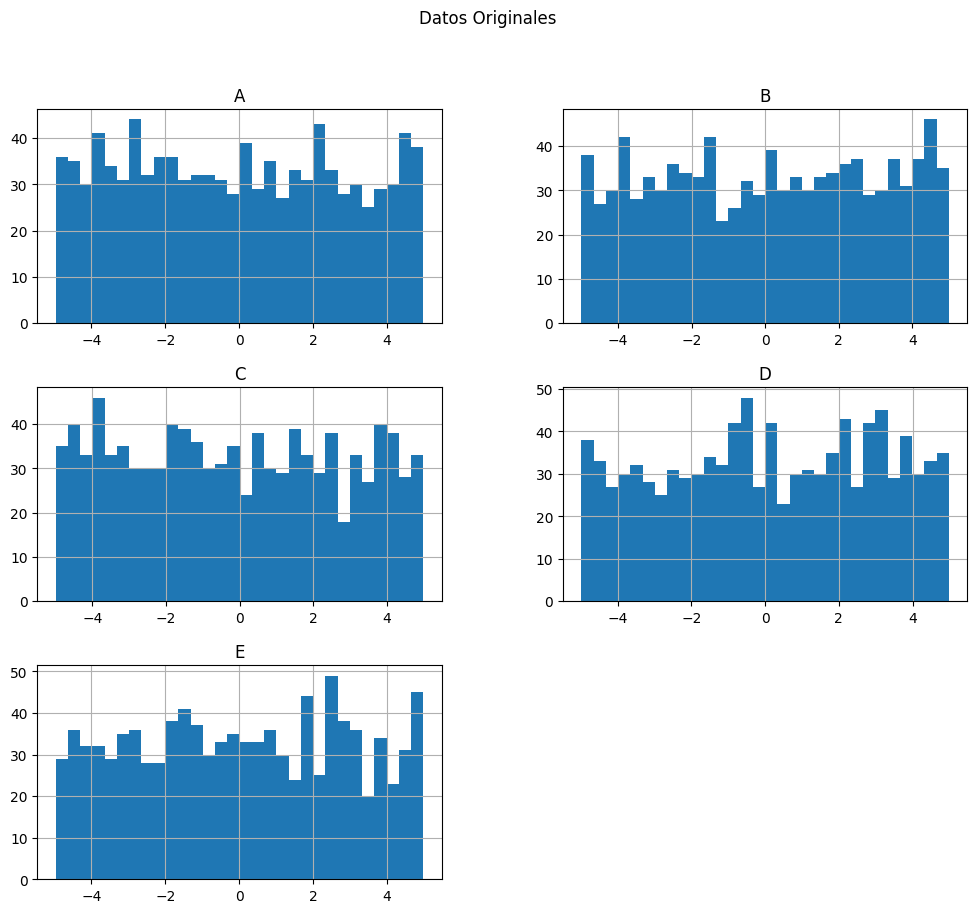

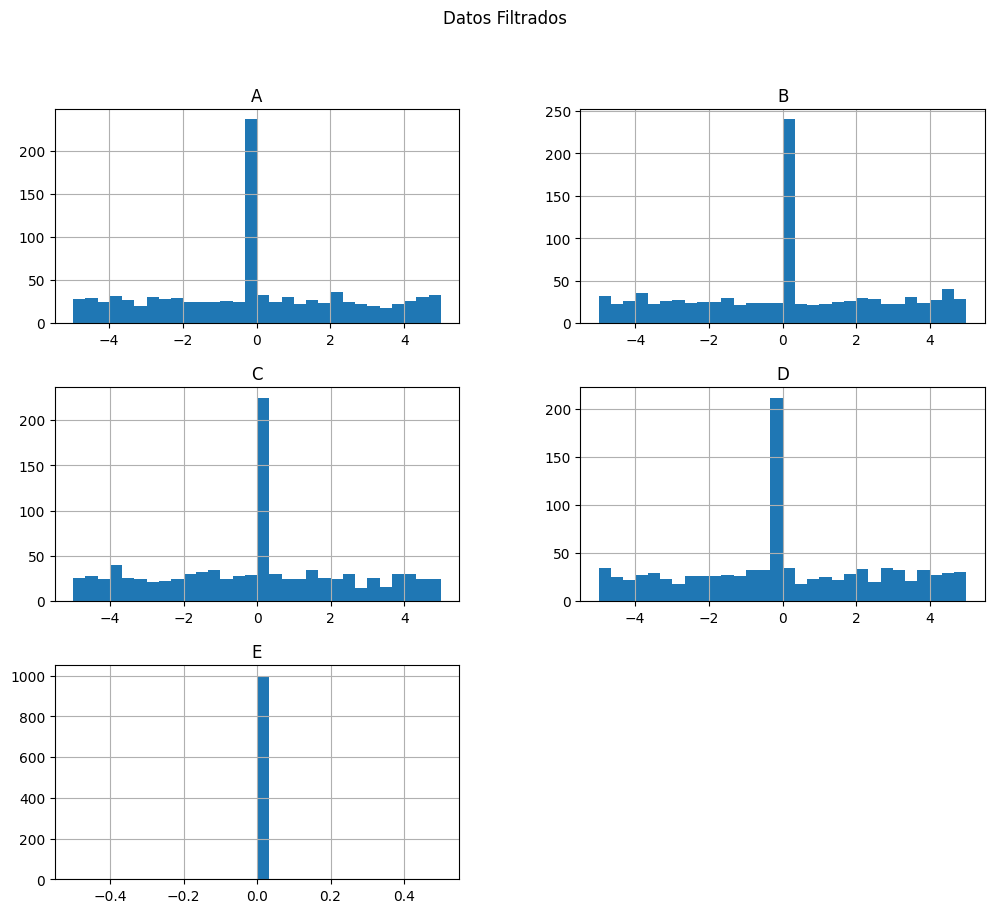

In [ ]:
import matplotlib.pyplot as plt

# Histograma de los datos originales
data_2.hist(bins=30, figsize=(12, 10))
plt.suptitle('Datos Originales')
plt.show()

# Histograma de los datos filtrados
data_2_filtrada.hist(bins=30, figsize=(12, 10))
plt.suptitle('Datos Filtrados')
plt.show()
